In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bookcrossing-dataset/Book reviews/BX-Users.csv
/kaggle/input/bookcrossing-dataset/Book reviews/BX-Books.csv
/kaggle/input/bookcrossing-dataset/Book reviews/BX-Book-Ratings.csv


# Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reading csv files

In [3]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX-Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)

# What does the data look like?

In [4]:
users.head(5)
users.shape

(278859, 3)

In [5]:
items.head(5)
items.shape

(271380, 8)

In [6]:
ratings.head(5)
ratings.shape

(1149781, 3)

In [7]:
users = users.drop(users.index[0])
items = items.drop(items.index[0])
ratings = ratings.drop(ratings.index[0])

# Merging the dataframes

In [8]:
df = pd.merge(users, ratings, on='user_id')
df = pd.merge(df, items, on='isbn')
df.head(5)
df.shape

(1031175, 12)

Changing The Dataframe chunk to 1 Lakh because I was running out of memory. you can work with original data which will give you better result.

In [9]:
df = df[:102000]
df.shape

(102000, 12)

# Dropping null values and Unwanted values

In [10]:
df = df.dropna()
df.drop(['img_s','img_m','img_l'],axis=1,inplace=True)
df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher
0,2,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
2,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
5,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
6,85526,"victoria, british columbia, canada",36,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
7,96054,"ottawa, ontario, canada",29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [11]:
df.describe()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher
count,72672,72672,72672,72672,72672,72672,72672,72672,72672
unique,17389,6992,112,2061,11,1999,1378,50,551
top,254,"toronto, ontario, canada",33,0971880107,0,Wild Animus,Rich Shapero,2002,Ballantine Books
freq,300,971,3166,2141,43718,2141,2141,9177,4751


# Changing datatypes

In [12]:
df['age'] = df['age'].astype(int)
df['user_id'] = df['user_id'].astype(int)
df['rating'] = df['rating'].astype(int)

## Splitting location column into newer columns

In [13]:
location = df.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

df['city'] = location['city']
df['state'] = location['state']
df['country'] = location['country']

In [14]:
df.head(5)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,city,state,country
0,2,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,stockton,california,usa
2,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada
5,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,toronto,ontario,canada
6,85526,"victoria, british columbia, canada",36,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,victoria,british columbia,canada
7,96054,"ottawa, ontario, canada",29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada


In [15]:
df.isna().sum()

user_id                   0
location                  0
age                       0
isbn                      0
rating                    0
book_title                0
book_author               0
year_of_publication       0
publisher                 0
city                      0
state                     0
country                1278
dtype: int64

Lets see which books got highest ratings. As we can see here these 5 books from top got 10/10 rating. Bit suspicious, it is possible that only one user read it and rate it as 10.

In [16]:
df.groupby('book_title')['rating'].mean().sort_values(ascending=False).head(5)

book_title
The Canopy                                       10.0
Humphrey's Corner                                10.0
Die Mechanismen der Freude. ErzÃ?Â¤hlungen.      10.0
Die Mars- Chroniken. Roman in ErzÃ?Â¤hlungen.    10.0
A polar bear called Pingo                        10.0
Name: rating, dtype: float64

So now we use the count() function to see the number of user that rated the books. In this we can see 'Wild Animus' has the most users rated to it.

In [17]:
df.groupby('book_title')['rating'].count().sort_values(ascending=False).head(5)

book_title
Wild Animus                                        2141
The Lovely Bones: A Novel                           920
The Da Vinci Code                                   695
Angels &amp; Demons                                 542
Divine Secrets of the Ya-Ya Sisterhood: A Novel     509
Name: rating, dtype: int64

In [18]:
ratings = pd.DataFrame(df.groupby('book_title')['rating'].mean())
ratings.head(5)

,rating
book_title,
101 Dalmatians,3.294118
"14,000 Things to Be Happy About",3.681818
1984,5.025806
1st to Die: A Novel,3.837500
2061: Odyssey Three,3.593750


In [19]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('book_title')['rating'].count())
ratings.head(5)

,rating,num of ratings
book_title,,
101 Dalmatians,3.294118,17
"14,000 Things to Be Happy About",3.681818,22
1984,5.025806,155
1st to Die: A Novel,3.837500,80
2061: Odyssey Three,3.593750,32


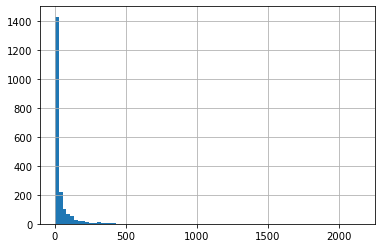

In [20]:
ratings['num of ratings'].hist(bins=80)

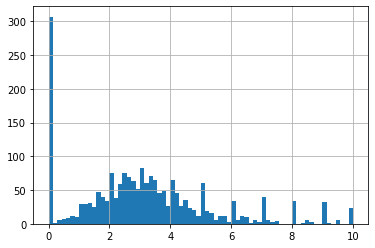

In [21]:
ratings['rating'].hist(bins=70)

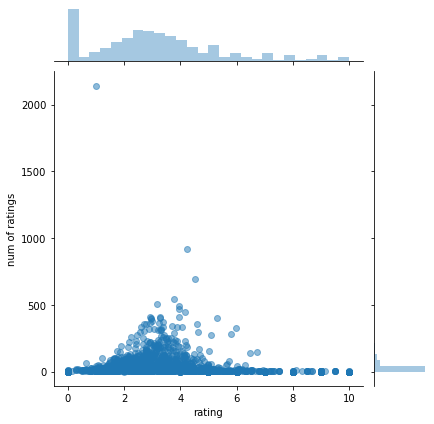

In [22]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [23]:
df.head(10)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,city,state,country
0,2,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,stockton,california,usa
2,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada
5,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,toronto,ontario,canada
6,85526,"victoria, british columbia, canada",36,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,victoria,british columbia,canada
7,96054,"ottawa, ontario, canada",29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada
10,177458,"ottawa, ontario, canada",29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada
13,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,halifax,nova scotia,canada
14,263325,"fredericton, new brunswick, canada",27,0002005018,6,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,fredericton,new brunswick,canada
16,2954,"wichita, kansas, usa",71,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,wichita,kansas,usa
17,152827,"ottawa, ontario, canada",40,0060973129,7,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,ottawa,ontario,canada


### We now create a pivot table. From this table we use the same users who rated for different books. This is collaborative filtering based recommendation system(similarity between users). 

In [24]:
df1 = df.pivot_table(index='user_id',columns='book_title',values='rating').fillna(0)
df1.head(10)

book_title,101 Dalmatians,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,2061: Odyssey Three,"28 Barbary Lane : A \Tales of the City\"" Omnibus""",2nd Chance,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",7b,8 Weeks to Optimum Health,...,Yarrow,Year's Best Fantasy (Year's Best Fantasy),You Be the Jury #02,You Can Surf the Net: Your Guide to the World of the Internet,You Cannot Be Serious,Your Erroneous Zones,Zeit im Wind.,Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,stardust
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
book_title,,
Wild Animus,0.989257,2141
The Lovely Bones: A Novel,4.238043,920
The Da Vinci Code,4.526619,695
Angels &amp; Demons,3.774908,542
Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.168959,509
Life of Pi,3.938650,489
The Red Tent (Bestselling Backlist),3.970339,472
The Secret Life of Bees,4.166292,445
Where the Heart Is (Oprah's Book Club (Paperback)),3.953431,408


# Collaborative Filtering Based Recommender

### DV_rating - The Da Vinci Code, LP_rating - Life of Pi, HP_rating - Harry Potter. I'm using these three books for our recomendation. 

In [26]:
DV_rating = df1['The Da Vinci Code']
LP_rating = df1['Life of Pi']
HP_rating = df1['Harry Potter and the Goblet of Fire (Book 4)']
DV_rating.head()

user_id
2     0.0
10    0.0
19    0.0
20    0.0
36    0.0
Name: The Da Vinci Code, dtype: float64

In [27]:
similar_to_DV = df1.corrwith(DV_rating)
similar_to_LP = df1.corrwith(LP_rating)
similar_to_HP = df1.corrwith(HP_rating)
similar_to_DV.sort_values(ascending=False).head()

book_title
The Da Vinci Code              1.000000
Angels &amp; Demons            0.162320
The Face                       0.075845
The Saving Graces : A Novel    0.071868
The Onion Girl                 0.070741
dtype: float64

In [28]:
corr_DV = pd.DataFrame(similar_to_DV,columns=['correlation'])
corr_DV.dropna(inplace=True)
corr_DV = corr_DV.join(ratings['num of ratings'])
corr_DV.head()

,correlation,num of ratings
book_title,,
101 Dalmatians,-0.002682,17
"14,000 Things to Be Happy About",0.013140,22
1984,0.035025,155
1st to Die: A Novel,0.028699,80
2061: Odyssey Three,0.007179,32


### We can see different books suggested whose number of ratings are less but has perfect correlation. So lets filter out the number of ratings to 200. This will improve our recommended books.

In [29]:
corr_DV[corr_DV['num of ratings']>200].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
book_title,,
The Da Vinci Code,1.000000,695
Angels &amp; Demons,0.162320,542
The Rainmaker,0.053305,275
Girl with a Pearl Earring,0.051692,332
To Kill a Mockingbird,0.046598,274


In [30]:
corr_LP = pd.DataFrame(similar_to_LP,columns=['correlation'])
corr_LP.dropna(inplace=True)
corr_LP = corr_LP.join(ratings['num of ratings'])

In [31]:
corr_LP[corr_LP['num of ratings']>200].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
book_title,,
Life of Pi,1.000000,489
Girl with a Pearl Earring,0.088701,332
The Lovely Bones: A Novel,0.066286,920
The Red Tent (Bestselling Backlist),0.058323,472
She's Come Undone (Oprah's Book Club (Paperback)),0.051390,331


In [32]:
corr_HP = pd.DataFrame(similar_to_HP,columns=['correlation'])
corr_HP.dropna(inplace=True)
corr_HP = corr_HP.join(ratings['num of ratings'])

In [33]:
corr_HP[corr_HP['num of ratings']>200].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
book_title,,
Harry Potter and the Prisoner of Azkaban (Book 3),0.517201,330
Harry Potter and the Chamber of Secrets (Book 2),0.466079,402
Harry Potter and the Order of the Phoenix (Book 5),0.366980,280
The Catcher in the Rye,0.059353,296
The Bonesetter's Daughter,0.058977,237
